In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [107]:
dataset=pd.read_csv(r"utt1.csv")

In [108]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,44256
1,1.3,52068
2,1.5,42423
3,2.0,49015
4,2.2,44879
5,2.9,63974
6,3.0,67982
7,3.2,61466
8,3.2,72892
9,3.7,64599


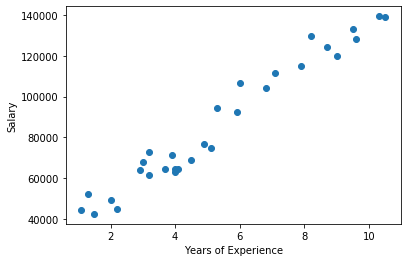

<Figure size 432x288 with 0 Axes>

In [109]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()
plt.savefig(r'Years of Experience.jpg')

In [110]:
X = dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [111]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [112]:
y

array([ 44256,  52068,  42423,  49015,  44879,  63974,  67982,  61466,
        72892,  64599,  71489,  63006,  64334,  64475,  69080,  76888,
        74704,  94245,  92266, 106699, 104171, 111677, 115158, 129547,
       124506, 120079, 133181, 128192, 139424, 138827])

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=101)

In [115]:
X_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [116]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [118]:
y_train

array([ 71489,  49015,  52068, 106699, 115158,  64334,  63974,  69080,
        44256, 111677,  44879,  72892,  64475,  64599,  76888, 138827,
       129547,  67982,  94245,  63006])

In [119]:
y_test

array([104171, 124506,  61466,  92266,  42423, 128192, 133181,  74704,
       120079, 139424])

# Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [121]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
y_pred_LR=LR.predict(X_test)

In [123]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [124]:
y_test

array([104171, 124506,  61466,  92266,  42423, 128192, 133181,  74704,
       120079, 139424])

In [127]:
y_pred_LR

array([103909.23587839, 125010.53378703,  63927.82931466,  93913.88423746,
        45047.72065957, 135005.88542796, 133895.29080119,  85029.1272233 ,
       128342.31766734, 142780.04781535])

In [128]:
diff_LR=y_test-y_pred_LR

In [129]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Original Data','Diff']

In [130]:
res_df

,Prediction,Original Data,Diff
0,103909.235878,104171,261.764122
1,125010.533787,124506,-504.533787
2,63927.829315,61466,-2461.829315
3,93913.884237,92266,-1647.884237
4,45047.720660,42423,-2624.720660
5,135005.885428,128192,-6813.885428
6,133895.290801,133181,-714.290801
7,85029.127223,74704,-10325.127223
8,128342.317667,120079,-8263.317667
9,142780.047815,139424,-3356.047815


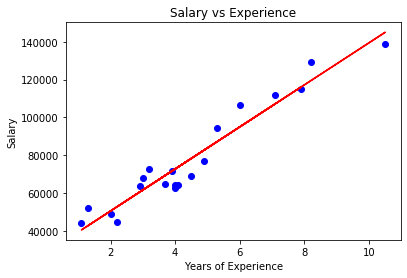

In [131]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.savefig(r'D:\Python37\Years of Experience.png')
plt.show()

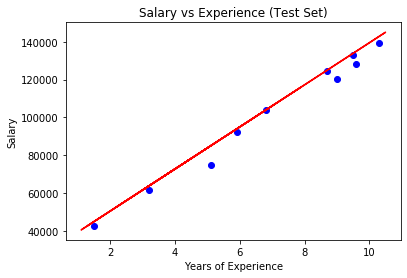

In [132]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

# Metrics

In [133]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
R2=metrics.r2_score(y_test,y_pred_LR)

In [134]:
rmse

4990.804878318653

In [135]:
R2

0.9749141191566963

In [136]:
LR.predict([[3]])

array([61706.64006112])

# Decision Tree Regressor

In [137]:
from sklearn.tree import DecisionTreeRegressor

In [138]:
DT=DecisionTreeRegressor()

In [139]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [140]:
y_pred_dt=DT.predict(X_test)

In [141]:
y_pred_dt

array([111677., 129547.,  72892., 106699.,  52068., 138827., 138827.,
        76888., 129547., 138827.])

In [142]:
y_test

array([104171, 124506,  61466,  92266,  42423, 128192, 133181,  74704,
       120079, 139424])

In [143]:
diff_DT=y_test-y_pred_dt

In [144]:
res_dt=pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']

In [145]:
res_dt

,Prediction,Original Data,Diff
0,111677.0,104171,-7506.0
1,129547.0,124506,-5041.0
2,72892.0,61466,-11426.0
3,106699.0,92266,-14433.0
4,52068.0,42423,-9645.0
5,138827.0,128192,-10635.0
6,138827.0,133181,-5646.0
7,76888.0,74704,-2184.0
8,129547.0,120079,-9468.0
9,138827.0,139424,597.0


In [146]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [147]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))
R2=metrics.r2_score(y_test,y_pred_dt)

In [100]:
rmse

8679.820047559659

In [101]:
R2

0.9241234687507364

In [102]:
from sklearn import tree

In [103]:
text_representation=tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [44256.41]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [52068.41]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [49015.73]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [44879.75]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [63974.62]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [67982.18]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [72892.33]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

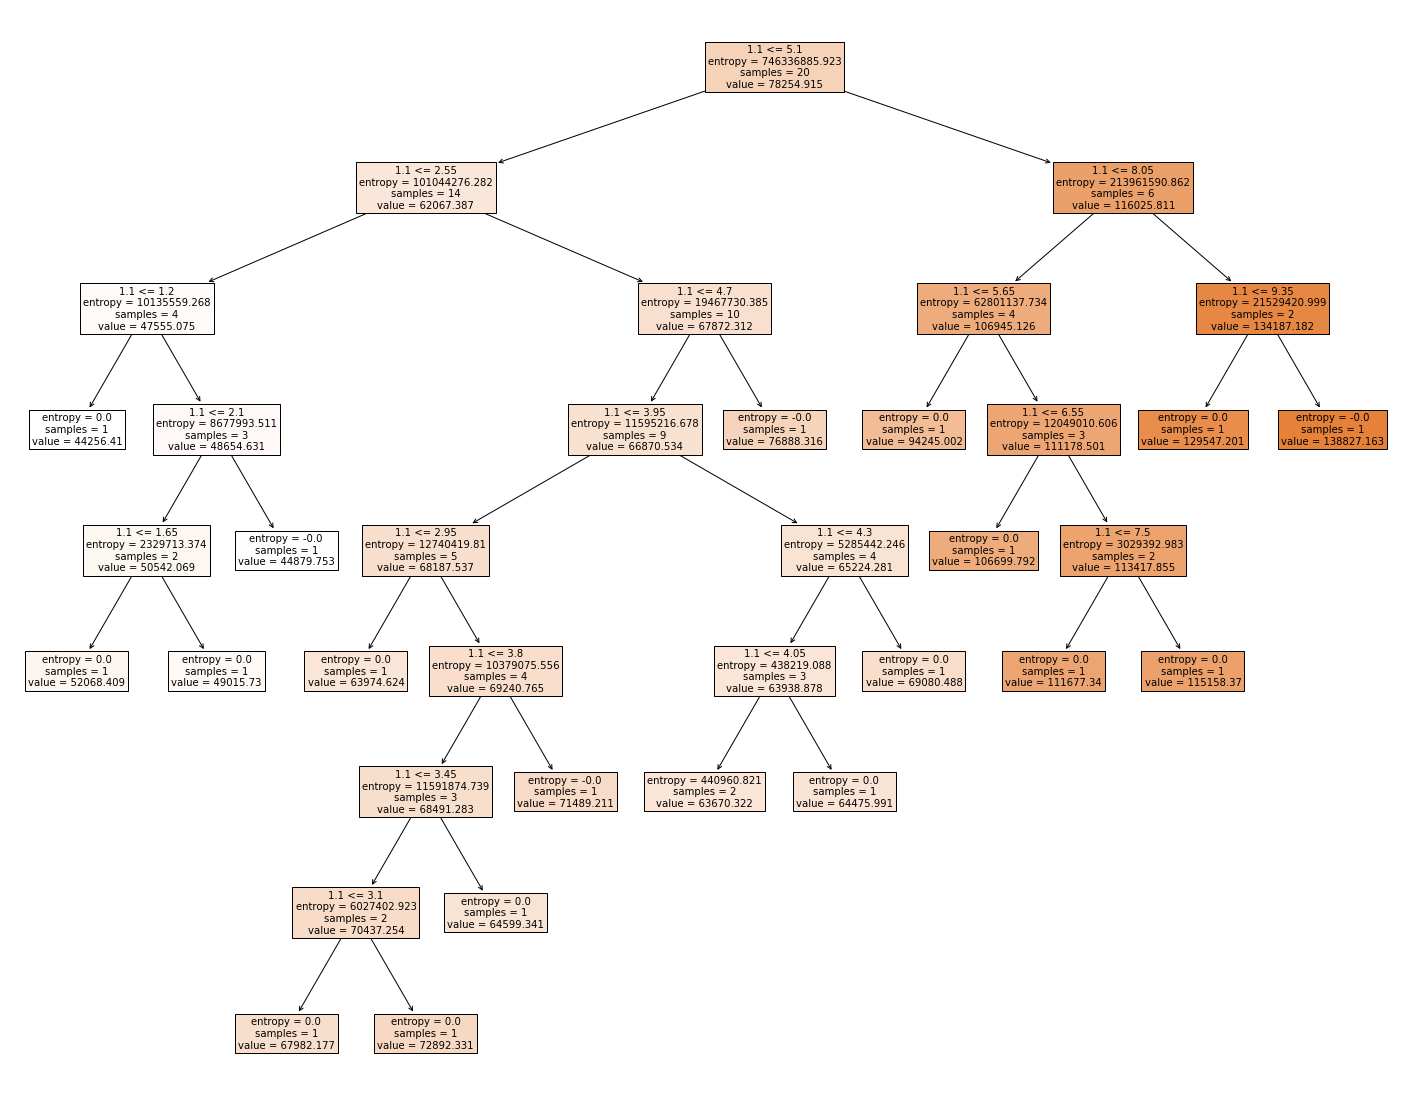

In [104]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset['YearsExperience'],filled=True)

In [105]:
fig.savefig(r'DT.png')